# Two Dimension Histogram Filter

## Part 1: Exploring the code
In this section, I'll confirm some existing codes. 

### 1.import function

In [7]:
## This code "imports" code from some of the other files
import simulate as sim
import helpers
import localizer

# for dealing with python2 as python3
from __future__ import division, print_function

# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Initial setting for robot simulation

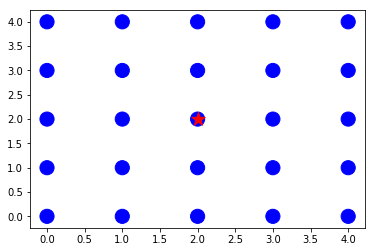

In [10]:
# This code defines a 5 * 5 robot world with initial belief.
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

NOTE! The robot doesn't have a working sense function at this point.


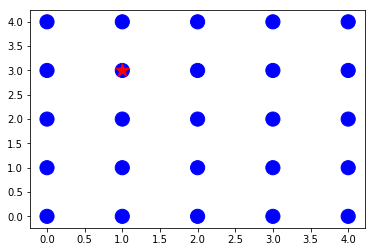

In [19]:
# This code try 1 simulation of robot.
simulation.run(1)
simulation.show_beliefs()

### 3.About beliefs that the robot have for making decition.

In [26]:
# This code indicates values of beliefs.
def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end=" ")
        print()

In [27]:
show_rounded_beliefs(simulation.beliefs)

0.040 0.040 0.040 0.040 0.040 
0.040 0.040 0.040 0.040 0.040 
0.040 0.040 0.040 0.040 0.040 
0.040 0.040 0.040 0.040 0.040 
0.040 0.040 0.040 0.040 0.040 


# Part 2: Implement a 2D sense function
In this section, I'll create the sense function in localizer.py.  
And I'll verify the function.

In [ ]:
reload(localizer)

def test_sense():
    """
    This code verify the sense function in localizer.py
    
    """
    
    
    R = 'r'
    _= 'g'
    
    simple _grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]
    
    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]
    
    observation = R
    
    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]
    
    p_hit = 3.0
    p_miss =1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)
    
    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
    
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect Height")
        return
    
    elif len(beliefs_after_sensing[0]) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
    
    total_probability = 0.0
    for  row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        print("Your beliefs appear to not be normalized")
        return

    print("Someshing isn't quite right with your sense function")
    
test_sense()

### Integration Testing

In [29]:
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'
grid =[
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

#Use small value for blur to reduce the uncertainty in MOTION
blur = 0.1
p_hit = 100
simulation = sim.Simulation(grid, blur, p_hit)

NOTE! The robot doesn't have a working sense function at this point.


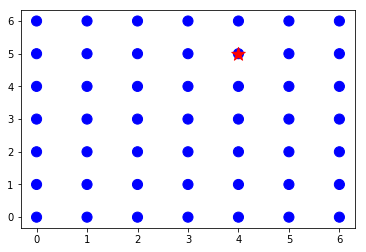

In [36]:
simulation.run(1)
simulation.show_beliefs()

# Part3: Identify and Reproduce a Bug

A user of your robot called tech support with a compaint

> "So I was using your robot in a square room and everything was fine.
Then I tried loading in a map for a rectangular room and it drove around for a couple seconds 
and then suddenly stopped working. Fix it!"

Now we have to debug. We are going to use a systematic approach.
1. Reproduce the bug
2. Read and understand the error message
3. Write a test that triggers the bug
4. Generate a hypothesis for the cause of the bug
5. Try a solution. If it fixes the bug, great! If not, go back to step 4.

### Step 1: Reproduce the bug

The user said that rectangular environments seem to be causing the bug.
I create the code for reproducing the bug.

In [ ]:
from simulate import Simulation
import simulate as sim
import helpers
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'
grid =[
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
]

#Use small value for blur to reduce the uncertainty in MOTION
blur = 0.1
p_hit = 100
simulation = sim.Simulation(grid, blur, p_hit)

### Step 2:Read and Understand the error message

### Step3:Write a test that reproduces the bug

### Step4:Generate a Hypothesis

### Step 5:Write a Fix